## Данные из приложения по доставке готовых продуктов

1. В первом тестировали разрешение фотографий блюд в приложении: пользователям показывались либо прямоугольные, либо новые квадратные


2. Во втором: была обновлена кнопка заказа, и часть юзеров видела старый вариант, а часть – новый

### Задача

Проверить гипотезы о наличии различий, сделать соответствующие выводы на основе статистических тестов и принять решения.

### Задания
1. Выберите метод, который предположительно подойдет в первом вопросе.


2. Проверьте, являются ли дисперсии внутри групп гомогенными.


3. Проведите тест на нормальность распределения.


4. Сравните средние в представленных группах.


5. Используйте критерий Тьюки и определите, между какими группами есть статистически значимые различия. 


6. Примите решение: какие картинки в итоге будем использовать?


7. Выберите метод для второго теста.


8. Визуализируйте распределение events для контрольной и тестовой групп. 


9. Посмотрите на описательные статистики events в разбивке по группе и по сегменту пользователя. 


10. Выберите формулу для модели, проведите тест.



### Описание данных

5_task_1:


id – id клиента в эксперименте  
group – в каком разрешении показывались картинки (A – прямоугольные 16:9, B – квадратные, C – прямоугольные 12:4)  
events – сколько блюд суммарно было заказано за период  


5_task_2:


id – id клиента в эксперименте  
segment – сегмент (high/low)  
group – вид кнопки (control – старая версия, test – новая версия)  
events – сколько блюд суммарно было заказано за период  

### SUMMARY 

1. Оценила гомогенность дисперсии внутри групп с помощью теста Левена, где не смогла отвергнуть Ho о  том, что группы гомогенны.


2. Провела тест Шапиро-Уилка для оценки нормальности распределения, предварительно проведя сэмплирование для каждой группы. pvalue > 0.05 для всех групп, значит не отвергаем Ho о том, что распределения нормальны. 


3. После этого оценила, является ли статистически значимым различия между средним количеством блюд в зависимости от картинки.  
Так как здесь 1 номинативная переменная(размер картинки) - провела однофакторный дисперсионный анализ(Фишера), где H0 о том, что различий между группами нет, была отвергнута. 


4. После этого, использовала тест Тьюки, чтобы сравнить группы попарно и определить, между какими именно группами  есть различия( во всех 3 попарных сравнениях была отвергнута Ho гипотеза о отсутствии различий)


5. Визуализировала полученные данные с помощью pointplot.   
Для группы B(квадратные картинки) было большее число покупок,а значит можем использовать их после проведенного стат. исследования 


6. Для данных о изменении размера кнопки изначально оценила различия между медианным и средним значением для контрольной и тестовой группы 


7. Провела множественный дисперсионный анализ(anova) так как 2 номинативные переменные(группа, сегмент группы) и 1 дискретная. 


8. После провела тест Тьюки, т.к. anova повышает риск ошибки первого рода.


9. При сравнении control/test - Ho о отсутствии стат. различий была отвергнута.  
Следовательно положительная  разница между  (test/high - control/high),  а так же (test/low - control/low) - стат. достоверна и доказывает, что изменение размера кнопки в тестовых группах привела к увеличению количества событий. 



In [70]:
#импортируем библиотеки
import pandas as pd

import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns


In [94]:
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm


In [14]:
df_1 = pd.read_csv('/Users/kamilamur/data from course/5_task_1.csv')
df_2 = pd.read_csv('/Users/kamilamur/data from course/5_task_2.csv')

In [12]:
df_1.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [24]:
#Необходимо оценить какой формат фотографий блюд является наилучшим
#т.е. в какой из групп в среднем покупали больше всего.

#Оценим гомогенность дисперсии внутрии групп с помощью теста Левена 
a_gropup = df_1.query('group=="A"').events
b_gropup = df_1.query('group=="B"').events
c_gropup = df_1.query('group=="C"').events

stats.levene(a_gropup,b_gropup,c_gropup) #p>0.05 - значит, мы не отвергаем H0 о гомогенности дисперсий


LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

In [42]:
#Проверяем на нормальность с помощью теста Шапиро-Вилка 

#Проводим сэмплирование на небольшой выборке из каждой группы

a_sample = df_1.query('group=="A"').events.sample(1000,random_state=17)
b_sample = df_1.query('group=="B"').events.sample(1000,random_state=17)
c_sample = df_1.query('group=="C"').events.sample(1000,random_state=17)


In [43]:
#Проводим тест Шапиро-Вилка для каждой группы
#Ho - что распределение является нормальным 

stats.shapiro(a_sample)

#p>0.05 значит, мы не можем отвергнуть Ho о том, что это распределение нормальное 


ShapiroResult(statistic=0.9973153471946716, pvalue=0.09609563648700714)

In [44]:
#p>0.05 значит, мы не можем отвергнуть Ho о том, что это распределение нормальное 

stats.shapiro(b_sample)


ShapiroResult(statistic=0.9980798363685608, pvalue=0.31768906116485596)

In [46]:
#p>0.05 значит, мы не можем отвергнуть Ho о том, что это распределение нормальное 

stats.shapiro(c_sample)


ShapiroResult(statistic=0.9981185793876648, pvalue=0.3359004259109497)

In [ ]:
#Теперь проводим тест, после оценки на гомогенность и нормальность 

#Вопрос: является ли статистически значимым различие между средним количеством блюд в зависимости от формата картинки


In [60]:
#Используем тест Фишера - т.к. у нас одна независимая переменная (однофакторный дисперсионный анализ)

#H0 - что у хотя бы 2 групп есть статистически значимые различия

f_oneway(df_1.query('group=="A"').events,
    df_1.query('group=="B"').events,
    df_1.query('group=="C"').events)

#p=0.0  - значит мы не можем отвергнуть H0  том, что хотя бы у двух групп есть статистически значимые различия в средних

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [71]:
#Теперь необходимо определить, между какими именно группами есть статистически значимые различия(тест Тьюки)

print(pairwise_tukeyhsd(df_1['events'],groups = df_1['group']).summary())


#Мы видим meandiff(group2 - group1)6 lower/upper(граница дов. интервала)

#teject=True во всех трех группах означает, что мы отвергаем H0 о том, что стат. значимых различий нет

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034 0.001   7.7038  8.3642   True
     A      C  -2.1093 0.001  -2.4395 -1.7791   True
     B      C -10.1433 0.001 -10.4735 -9.8131   True
----------------------------------------------------


Text(0, 0.5, 'среднее число покупок')

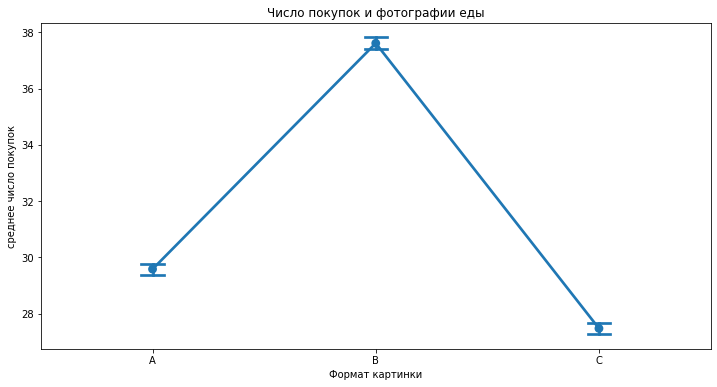

In [80]:
#Визуализируем полученные данные 

plt.figure(figsize=(12,6))
sns.pointplot(x = 'group', y = 'events', data = df_1,capsize = .1)
plt.title('Число покупок и фотографии еды')
plt.xlabel('Формат картинки')
plt.ylabel('среднее число покупок')

#В группе B наибольшее число покупок

In [ ]:
#Вывод: будем использовать квадратные картинки(group B), т.к. анализ показал, что различия между средними значениями
# стат. значимы в сравнении с остальными группами(самое большое значение)

In [81]:
#Во втором эксперименте требуется проверить, как пользователи отреагируют на 
#изменение формата кнопки оформления заказа, с разбивкой по сегменту клиента.

df_2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


In [ ]:
#Будем использовать множественный дисперсионный анализ, т.к. имеются 2 номинативные переменные(group,segment)

#

<AxesSubplot:xlabel='events'>

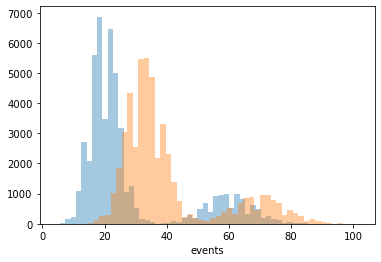

In [87]:
#Для начала визуализируем распределение events для контрольной и тестовой групп.

sns.distplot(df_2.query('group=="control"').events,kde=False)

sns.distplot(df_2.query('group=="test"').events,kde=False)


In [89]:
#Посчитайте среднее, медиану и стандартное отклонение events в разбивке по группе и по сегменту пользователя. 

df_2.groupby(['group','segment']).events.mean()

group    segment
control  high       59.970800
         low        20.031575
test     high       69.938500
         low        33.025925
Name: events, dtype: float64

In [90]:
df_2.groupby(['group','segment']).events.std()

group    segment
control  high       7.805347
         low        4.473576
test     high       8.403974
         low        5.720845
Name: events, dtype: float64

In [91]:
df_2.groupby(['group','segment']).events.median()

group    segment
control  high       60.0
         low        20.0
test     high       70.0
         low        33.0
Name: events, dtype: float64

In [96]:
#Видим, что среднее и медианное значение в обоих сегментах(high,low) выше в тестовой группе в сравнении с контролем

#Вопрос: эти различия статистически значимые или нет?

#т.к.у нас 2 номинативные переменные(группа и сегмент группы) и 1 дискретная(событие) - 
#Проводим множественный дисперсионный анализ(anova)

#Для начала выводим формулу: events~group + segment +segment:group
#Затем строим модель по нашей формуле
#Затем проводим сам анализ anova

model = smf.ols(formula='events~group + segment +segment:group',data = df_2).fit()  #fit() - строит модель

aov_table = anova_lm(model,typ = 2) #typ = 2 - 2 тип суммы квадратов

print(aov_table)

                     sum_sq       df              F         PR(>F)
group          3.837195e+06      1.0  112031.864119   0.000000e+00
segment        2.362480e+07      1.0  689756.377485   0.000000e+00
segment:group  3.664244e+04      1.0    1069.823273  2.060261e-233
Residual       3.424956e+06  99996.0            NaN            NaN


In [100]:
#Создадим колонку из комбинации группа/сегмент, для дальнейшего удобства

df_2['combination'] = df_2.group + ' \ '  + df_2.segment  #обязательно 2 пробела ' \ '
df_2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test \ high
1,96723,test,high,71.0,test \ high
2,68719,test,high,80.0,test \ high
3,50399,test,high,80.0,test \ high
4,95613,test,high,78.0,test \ high


In [101]:
#т.к. при множестевенном дисперсионном анализе повышается риск ошибки первого рода - проводим тест Тьюки

print(pairwise_tukeyhsd(df_2['events'], groups = df_2['combination']).summary())


#regect во всех группах true - то есть отвергаем H0 о том, что стат. значимых различий между средними нет 
#разница средних в test group в обоих сегментах(high and low) - положительная и эти значения стат. значимы
# то есть действительно наблюдаем увеличение событий в тестовой группе при изменении формата кнопки


        Multiple Comparison of Means - Tukey HSD, FWER=0.05         
    group1         group2    meandiff p-adj  lower    upper   reject
--------------------------------------------------------------------
control \ high control \ low -39.9392 0.001 -40.1073 -39.7711   True
control \ high   test \ high   9.9677 0.001   9.7551  10.1803   True
control \ high    test \ low -26.9449 0.001  -27.113 -26.7768   True
 control \ low   test \ high  49.9069 0.001  49.7388   50.075   True
 control \ low    test \ low  12.9944 0.001   12.888  13.1007   True
   test \ high    test \ low -36.9126 0.001 -37.0807 -36.7445   True
--------------------------------------------------------------------


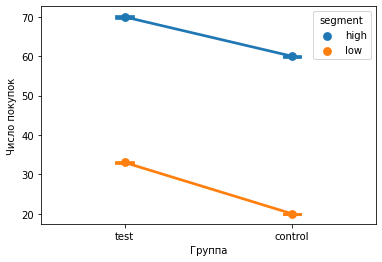

In [107]:
#Визуализируем результаты с помощью pointplot

sns.pointplot(x = 'group', y = 'events', hue = 'segment', data = df_2,capsize = .1)
plt.xlabel('Группа')
plt.ylabel('Число покупок')
plt.show()